# Earthquake seismology with DAS



In [49]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
from dasquakes import sintela_to_datetime, open_sintela_file, local_earthquake_quicklook, data_wrangler, haversine
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from libcomcat.search import search
from libcomcat.dataframes import get_summary_data_frame
import geopy.distance

In [11]:
# LOADING DATA WITH PGV AND PGA FROM DIFFERENT EVENT (CLIPPED AND NOT CLIPPED)
clip = pd.read_csv('Clippedanalisis5.csv')

# Loading clipped events


In [12]:
clip


,Magnitud,id_event,Location,detect_das,clipped,PGA_PRIN,PGA_SALO,PGA_CHIMA,PGV_PRIN,PGV_SALO,PGV_CHIMA
0,5.35,nc73827571,815.823922,True,TRUE,0.000147,0.000038,0.000123,5.070000e-06,1.310000e-06,0.000002
1,4.92,nc73821046,806.386428,True,TRUE,0.000027,0.000011,0.000101,1.030000e-06,3.540000e-07,0.000002
2,4.90,us6000j8c6,877.203601,False,FALSE,0.000150,0.000021,0.000298,2.590000e-06,6.730000e-07,0.000006
3,5.20,us7000irbr,606.808105,True,TRUE,0.000180,0.000044,0.000488,5.030000e-06,2.470000e-06,0.000007
4,5.10,us7000hf29,790.117236,True,FALSE,0.000816,0.000021,0.000360,1.170000e-05,5.940000e-07,0.000006
5,4.90,us7000ishe,NaN,True,FALSE,0.000987,0.000334,0.000562,4.140000e-05,2.030000e-05,0.000037
6,5.10,us7000gxl1,677.999050,True,FALSE,0.000206,0.000147,0.000105,8.290000e-06,6.940000e-06,0.000003
7,6.40,nc73821036,809.854647,True,TRUE,0.000237,0.000082,0.000089,1.190000e-05,4.420000e-06,0.000004
8,2.76,nc73821066,NaN,True,TRUE,0.000024,0.000006,0.000101,6.060000e-07,3.170000e-07,0.000002
9,5.30,us6000j5n4,NaN,True,FALSE,0.000220,0.000031,0.000157,4.280000e-06,2.580000e-06,0.000005


# Making histograms for each "accelerometer" (stations)

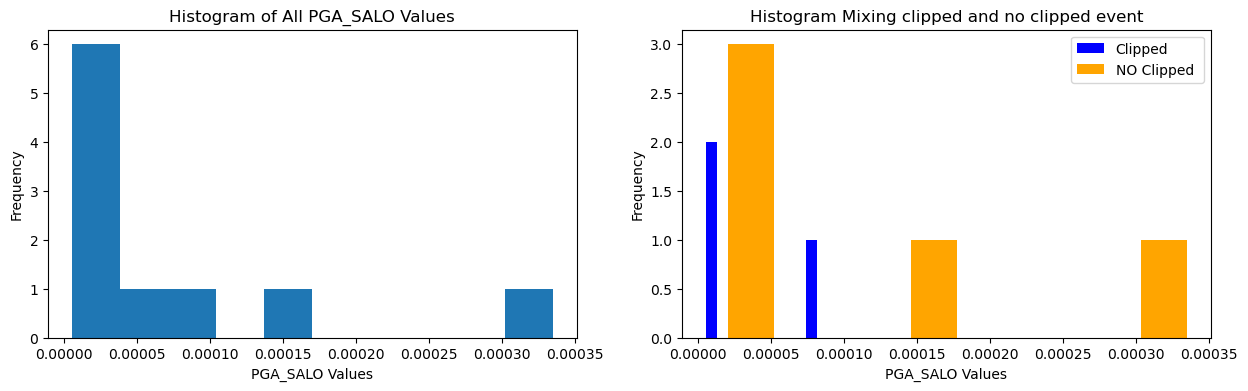

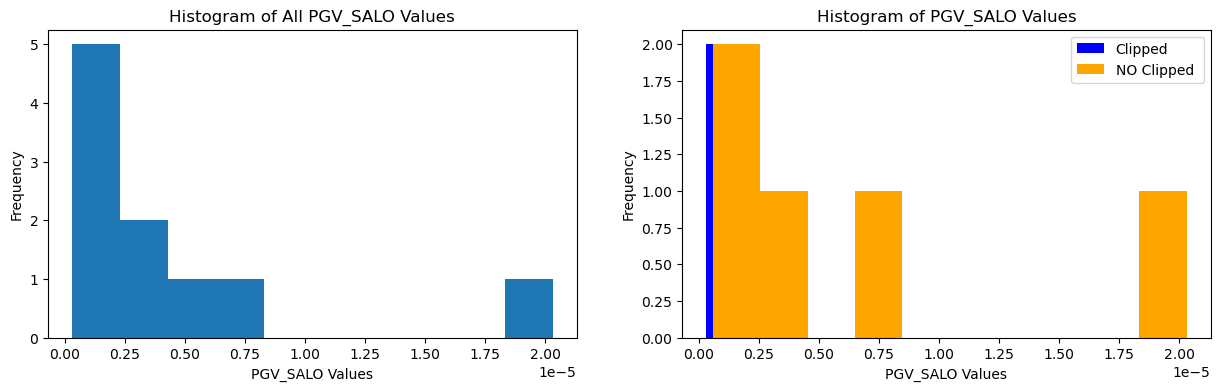

In [43]:
#  DataFrame is named 'clip'
pga_salo_values = clip['PGA_SALO'].dropna()

pga_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGA_SALO'].dropna()
pga_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGA_SALO'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pga_salo_values, bins=10)
ax[0].set_xlabel('PGA_SALO Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGA_SALO Values')

# Create the histogram for clipped = True
ax[1].hist(pga_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pga_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGA_SALO Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram Mixing clipped and no clipped event')
ax[1].legend()
# Display the histogram
 
    ## we will do the same but for PGV
    
plt.show()

pgv_salo_values = clip['PGV_SALO'].dropna()

pgv_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGV_SALO'].dropna()
pgv_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGV_SALO'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pgv_salo_values, bins=10)
ax[0].set_xlabel('PGV_SALO Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGV_SALO Values')

# Create the histogram for clipped = True and false
ax[1].hist(pgv_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pgv_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGV_SALO Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of PGV_SALO Values')
ax[1].legend()

# Display the histogram
plt.show()




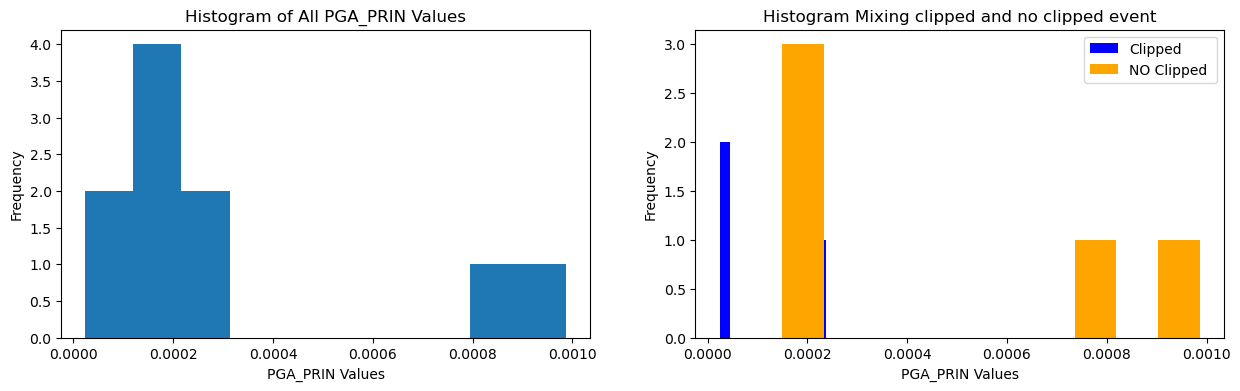

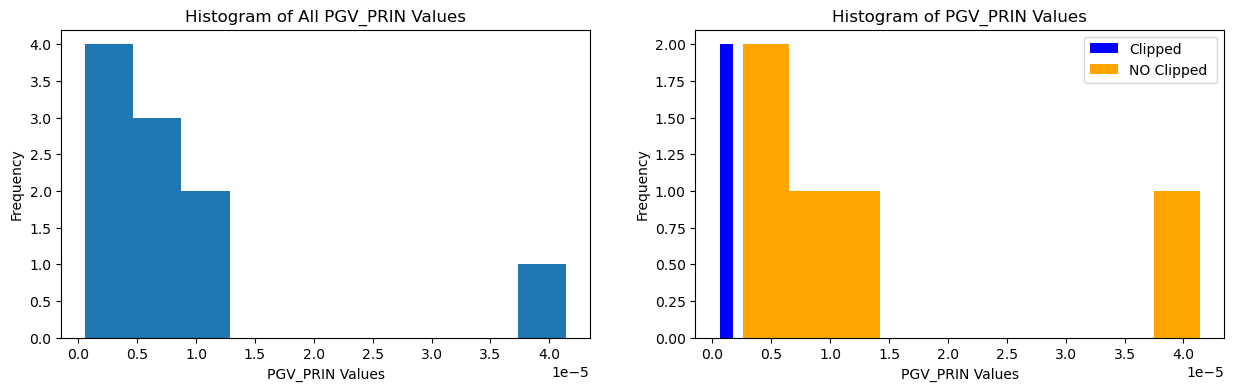

In [44]:
#  DataFrame is named 'clip'
pga_salo_values = clip['PGA_PRIN'].dropna()

pga_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGA_PRIN'].dropna()
pga_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGA_PRIN'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pga_salo_values, bins=10)
ax[0].set_xlabel('PGA_PRIN Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGA_PRIN Values')

# Create the histogram for clipped = True
ax[1].hist(pga_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pga_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGA_PRIN Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram Mixing clipped and no clipped event')
ax[1].legend()
# Display the histogram
 
    ## we will do the same but for PGV
    
plt.show()

pgv_salo_values = clip['PGV_PRIN'].dropna()

pgv_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGV_PRIN'].dropna()
pgv_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGV_PRIN'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pgv_salo_values, bins=10)
ax[0].set_xlabel('PGV_PRIN Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGV_PRIN Values')

# Create the histogram for clipped = True and false
ax[1].hist(pgv_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pgv_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGV_PRIN Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of PGV_PRIN Values')
ax[1].legend()

# Display the histogram
plt.show()

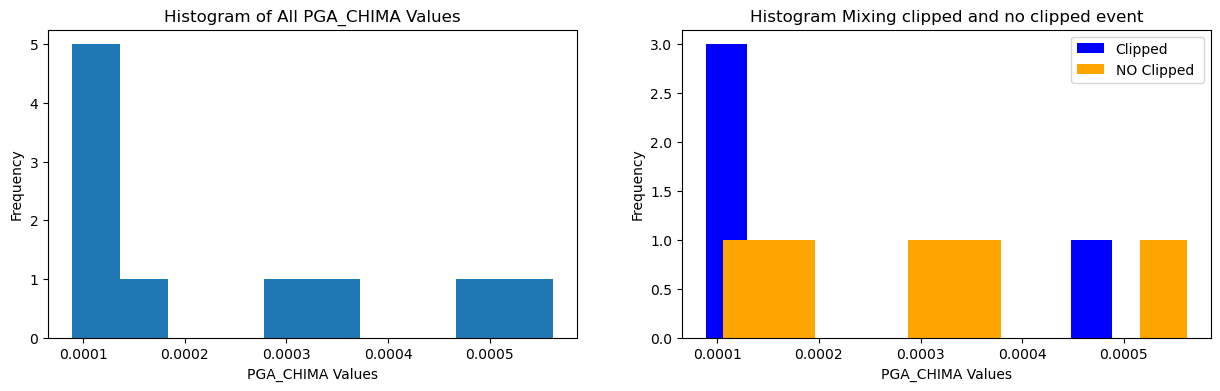

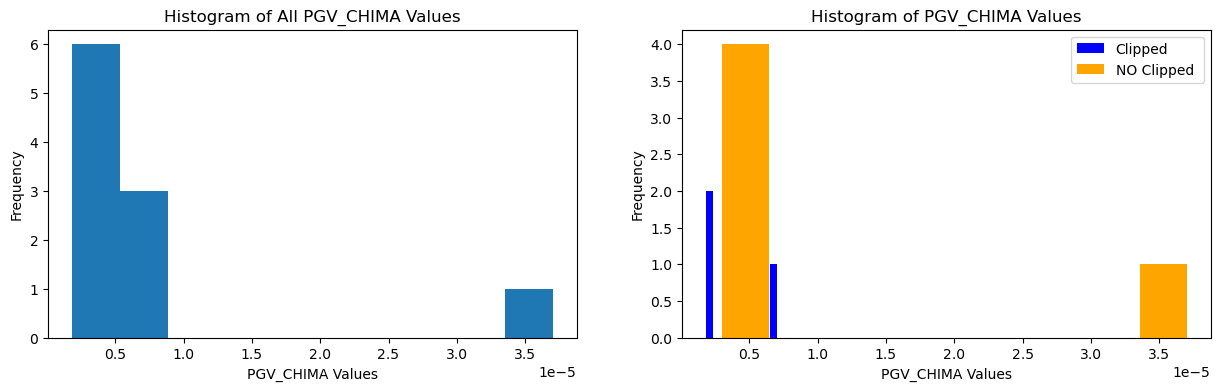

In [45]:
#  DataFrame is named 'clip'
pga_salo_values = clip['PGA_CHIMA'].dropna()

pga_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGA_CHIMA'].dropna()
pga_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGA_CHIMA'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pga_salo_values, bins=10)
ax[0].set_xlabel('PGA_CHIMA Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGA_CHIMA Values')

# Create the histogram for clipped = True
ax[1].hist(pga_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pga_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGA_CHIMA Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram Mixing clipped and no clipped event')
ax[1].legend()
# Display the histogram
 
    ## we will do the same but for PGV
    
plt.show()

pgv_salo_values = clip['PGV_CHIMA'].dropna()

pgv_salo_values_true = clip.loc[clip['clipped'] == 'TRUE', 'PGV_CHIMA'].dropna()
pgv_salo_values_false = clip.loc[clip['clipped'] == 'FALSE', 'PGV_CHIMA'].dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create the histogram for all values
ax[0].hist(pgv_salo_values, bins=10)
ax[0].set_xlabel('PGV_CHIMA Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of All PGV_CHIMA Values')

# Create the histogram for clipped = True and false
ax[1].hist(pgv_salo_values_true, bins=10, color='blue', label='Clipped')
ax[1].hist(pgv_salo_values_false, bins=10, color='orange', label='NO Clipped ')
ax[1].set_xlabel('PGV_CHIMA Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of PGV_CHIMA Values')
ax[1].legend()

# Display the histogram
plt.show()

In [48]:
pga_salo_values_false

2    0.000298
4    0.000360
5    0.000562
6    0.000105
9    0.000157
Name: PGA_CHIMA, dtype: float64

In [46]:
pga_salo_values

0    0.000123
1    0.000101
2    0.000298
3    0.000488
4    0.000360
5    0.000562
6    0.000105
7    0.000089
8    0.000101
9    0.000157
Name: PGA_CHIMA, dtype: float64